In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime

env_name = 'CustomPendulum-v0'

bif_c = 0.1
num_iter_max=10000
vae_lr=5e-4


In [2]:
import gym
import custom_gym
env = gym.make(env_name)
s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = 1
print(s_dim, a_dim, z_dim)

2 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/proxima-hishinuma/anaconda3/

In [3]:
from sac import SAC
agent = SAC(env.observation_space.shape[0], env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_pendulum_", evaluate=True)
agent.policy.my_np_compile()

Loading models from checkpoints/sac_checkpoint_custom_pendulum_


In [4]:
# # # # データ生成
# from get_offline_data import getOfflineData
# getOfflineData(env_name=env_name, episode_num=100)

In [5]:
offline_data = pickle.load(open("offline_data.pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info.pkl","rb"))
debug_info = np.array(debug_info)
print(debug_info.shape)
# c_array = debug_info[:,1]

# episode_index = 9
# plt.plot(offline_data[episode_index][:,0],offline_data[episode_index][:,1])
# print("env_param: ",debug_info[episode_index])

(100, 2)


In [6]:
import importlib
import vi_base
importlib.reload(vi_base)

args_init_dict = {"offline_data": offline_data,
             "s_dim": s_dim,
             "a_dim": a_dim,
             "z_dim": z_dim,
#              "policy":agent.select_action,
             "policy":agent.policy.my_np_select_action,
             "debug_info":debug_info,
             "env" : env}

vi = vi_base.baseVI(args_init_dict)


In [7]:
vi.get_real_rollout_data()

0  1  2  3  4  5  

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ

6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   


tensor(2.8330)tensor(6.4749)tensor(5.2778)tensor(4.9017)tensor(2.9698)tensor(9.6140)tensor(3.4960)tensor(4.4339)tensor(3.6634)tensor(4.1051)tensor(3.8289)tensor(7.3527)tensor(4.2839)tensor(7.1324)tensor(8.5549)tensor(9.5053)tensor(5.1862)tensor(6.2448)tensor(3.2380)tensor(4.6179)tensor(6.9106)tensor(6.1630)tensor(4.6974)tensor(3.1409)tensor(6.1055)tensor(6.9212)tensor(3.6279)tensor(5.0028)tensor(4.4461)tensor(3.4110)tensor(5.4212)tensor(3.0558)tensor(6.9153)tensor(5.9164)tensor(5.6316)tensor(10.)tensor(5.3057)tensor(4.1543)tensor(4.9349)tensor(6.5062)tensor(5.7659)tensor(3.6379)tensor(7.7655)tensor(4.1452)tensor(4.3297)tensor(6.4458)tensor(4.1032)tensor(3.5447)tensor(5.9673)tensor(4.6048)tensor(2.7983)tensor(3.4896)tensor(6.6367)tensor(3.5696)tensor(7.7458)tensor(3.1576)tensor(3.3562)tensor(5.6942)tensor(3.5629)tensor(5.5337)tensor(6.5587)tensor(2.4693)tensor(3.3149)tensor(3.4391)tensor(4.6163)tensor(5.3689)tensor(6.5360)tensor(2.7579)tensor(3.3110)tensor(5.8046)tensor(3.2051)tensor(5.

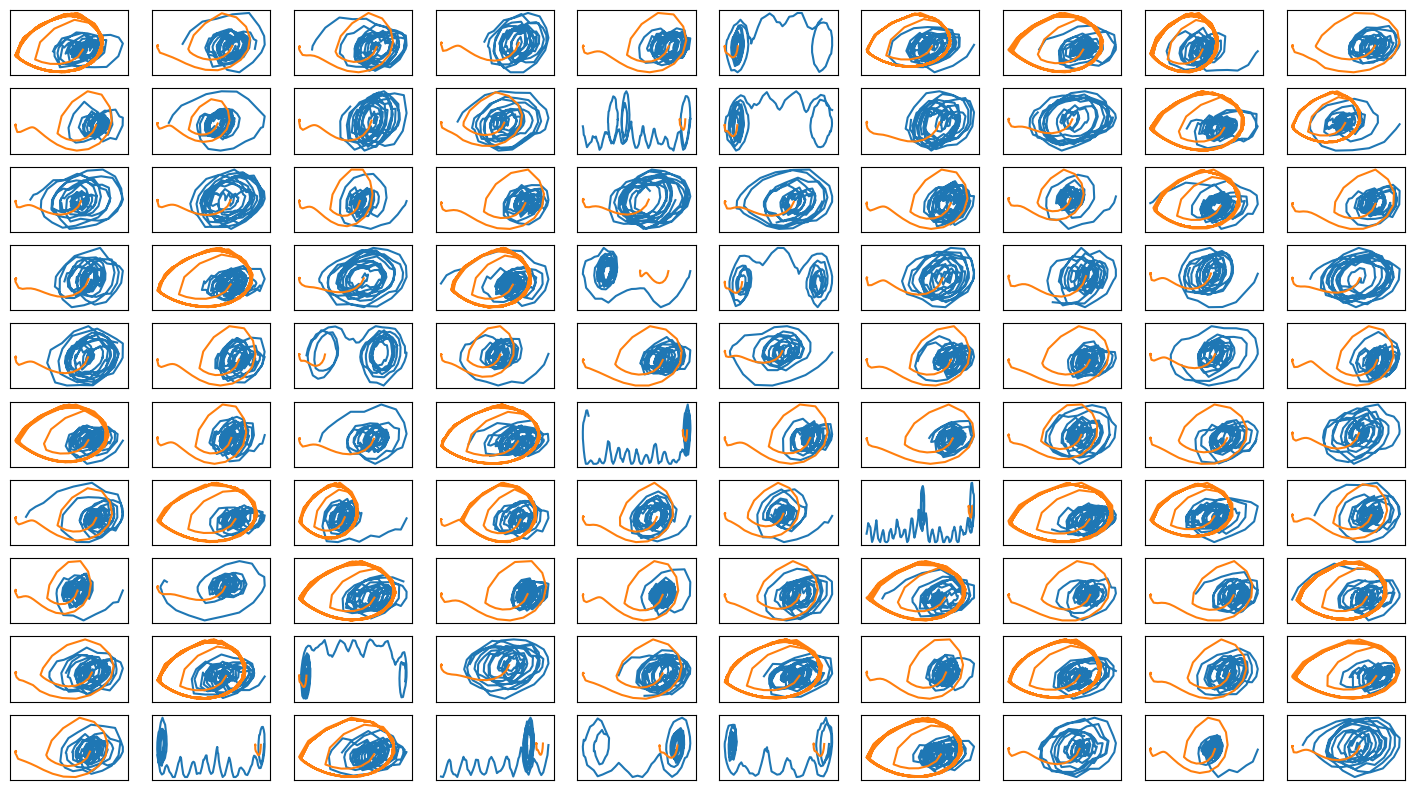

In [8]:
fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)))
ax_list = []
for i in range(len(offline_data)):
    print(vi.offline_data[i][:,1].max(), end="")
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(vi.offline_data[i][:,0], vi.offline_data[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1]) 
print("オフラインデータvs実環境方策rollout")
plt.show()

train_weighted_vae: enc_dec
train: iter 0  trainloss 707.16225  validloss 820.71658±0.00000  bestvalidloss 820.71658  last_update 0
train: iter 1  trainloss 402.20409  validloss 480.53132±0.00000  bestvalidloss 480.53132  last_update 0
train: iter 2  trainloss 335.66794  validloss 272.82090±0.00000  bestvalidloss 272.82090  last_update 0
train: iter 3  trainloss 391.66721  validloss 738.51743±0.00000  bestvalidloss 272.82090  last_update 1
train: iter 4  trainloss 296.55902  validloss 327.48620±0.00000  bestvalidloss 272.82090  last_update 2
train: iter 5  trainloss 238.79327  validloss 267.42569±0.00000  bestvalidloss 267.42569  last_update 0
train: iter 6  trainloss 192.20092  validloss 215.61242±0.00000  bestvalidloss 215.61242  last_update 0
train: iter 7  trainloss 170.01873  validloss 179.95659±0.00000  bestvalidloss 179.95659  last_update 0
train: iter 8  trainloss 139.96616  validloss 159.10525±0.00000  bestvalidloss 159.10525  last_update 0
train: iter 9  trainloss 114.74327  

train: iter 77  trainloss -500.69765  validloss -475.72646±0.00000  bestvalidloss -477.31835  last_update 6
train: iter 78  trainloss -498.02116  validloss -449.27339±0.00000  bestvalidloss -477.31835  last_update 7
train: iter 79  trainloss -507.08076  validloss -460.43336±0.00000  bestvalidloss -477.31835  last_update 8
train: iter 80  trainloss -512.36068  validloss -470.52944±0.00000  bestvalidloss -477.31835  last_update 9
train: iter 81  trainloss -509.10236  validloss -481.85450±0.00000  bestvalidloss -481.85450  last_update 0
train: iter 82  trainloss -505.01176  validloss -452.13686±0.00000  bestvalidloss -481.85450  last_update 1
train: iter 83  trainloss -515.29450  validloss -487.54832±0.00000  bestvalidloss -487.54832  last_update 0
train: iter 84  trainloss -522.25344  validloss -490.30531±0.00000  bestvalidloss -490.30531  last_update 0
train: iter 85  trainloss -522.27948  validloss -496.22531±0.00000  bestvalidloss -496.22531  last_update 0
train: iter 86  trainloss -5

train: iter 153  trainloss -620.35136  validloss -560.21831±0.00000  bestvalidloss -608.69862  last_update 8
train: iter 154  trainloss -624.75585  validloss -599.45146±0.00000  bestvalidloss -608.69862  last_update 9
train: iter 155  trainloss -593.87103  validloss -609.45132±0.00000  bestvalidloss -609.45132  last_update 0
train: iter 156  trainloss -633.54479  validloss -591.77904±0.00000  bestvalidloss -609.45132  last_update 1
train: iter 157  trainloss -623.99039  validloss -582.21678±0.00000  bestvalidloss -609.45132  last_update 2
train: iter 158  trainloss -610.80600  validloss -598.25107±0.00000  bestvalidloss -609.45132  last_update 3
train: iter 159  trainloss -620.11066  validloss -580.88690±0.00000  bestvalidloss -609.45132  last_update 4
train: iter 160  trainloss -575.18572  validloss -518.99400±0.00000  bestvalidloss -609.45132  last_update 5
train: iter 161  trainloss -605.22829  validloss -505.55792±0.00000  bestvalidloss -609.45132  last_update 6
train: iter 162  tr

train: iter 228  trainloss -659.62488  validloss -648.91438±0.00000  bestvalidloss -660.57729  last_update 1
train: iter 229  trainloss -681.41294  validloss -644.62073±0.00000  bestvalidloss -660.57729  last_update 2
train: iter 230  trainloss -659.33919  validloss -620.82164±0.00000  bestvalidloss -660.57729  last_update 3
train: iter 231  trainloss -644.55400  validloss -653.24732±0.00000  bestvalidloss -660.57729  last_update 4
train: iter 232  trainloss -689.73312  validloss -627.63076±0.00000  bestvalidloss -660.57729  last_update 5
train: iter 233  trainloss -685.48592  validloss -650.45529±0.00000  bestvalidloss -660.57729  last_update 6
train: iter 234  trainloss -661.14550  validloss -649.51776±0.00000  bestvalidloss -660.57729  last_update 7
train: iter 235  trainloss -680.65910  validloss -632.29156±0.00000  bestvalidloss -660.57729  last_update 8
train: iter 236  trainloss -683.47376  validloss -618.13678±0.00000  bestvalidloss -660.57729  last_update 9
train: iter 237  tr

train: iter 305  trainloss -701.54384  validloss -666.05515±0.00000  bestvalidloss -678.87042  last_update 27
train: iter 306  trainloss -702.39903  validloss -655.44858±0.00000  bestvalidloss -678.87042  last_update 28
train: iter 307  trainloss -659.46958  validloss -654.37252±0.00000  bestvalidloss -678.87042  last_update 29
train: iter 308  trainloss -702.87574  validloss -672.70932±0.00000  bestvalidloss -678.87042  last_update 30
train: iter 309  trainloss -713.02900  validloss -657.27266±0.00000  bestvalidloss -678.87042  last_update 31
train: iter 310  trainloss -711.08507  validloss -647.39749±0.00000  bestvalidloss -678.87042  last_update 32
train: iter 311  trainloss -634.75796  validloss -609.19145±0.00000  bestvalidloss -678.87042  last_update 33
train: iter 312  trainloss -624.93210  validloss -415.57876±0.00000  bestvalidloss -678.87042  last_update 34
train: iter 313  trainloss -513.20595  validloss -616.40320±0.00000  bestvalidloss -678.87042  last_update 35
train: ite

train: iter 380  trainloss -661.75937  validloss -691.18222±0.00000  bestvalidloss -693.83194  last_update 10
train: iter 381  trainloss -719.33882  validloss -691.95364±0.00000  bestvalidloss -693.83194  last_update 11
train: iter 382  trainloss -721.84142  validloss -662.40972±0.00000  bestvalidloss -693.83194  last_update 12
train: iter 383  trainloss -716.85408  validloss -680.70372±0.00000  bestvalidloss -693.83194  last_update 13
train: iter 384  trainloss -686.53310  validloss -659.91167±0.00000  bestvalidloss -693.83194  last_update 14
train: iter 385  trainloss -688.79788  validloss -660.16554±0.00000  bestvalidloss -693.83194  last_update 15
train: iter 386  trainloss -691.51911  validloss -631.79095±0.00000  bestvalidloss -693.83194  last_update 16
train: iter 387  trainloss -724.99448  validloss -662.74847±0.00000  bestvalidloss -693.83194  last_update 17
train: iter 388  trainloss -698.83772  validloss -677.19335±0.00000  bestvalidloss -693.83194  last_update 18
train: ite

train: iter 455  trainloss -719.37257  validloss -627.72551±0.00000  bestvalidloss -700.69101  last_update 29
train: iter 456  trainloss -683.48863  validloss -695.67482±0.00000  bestvalidloss -700.69101  last_update 30
train: iter 457  trainloss -722.26107  validloss -691.27722±0.00000  bestvalidloss -700.69101  last_update 31
train: iter 458  trainloss -705.97768  validloss -681.96161±0.00000  bestvalidloss -700.69101  last_update 32
train: iter 459  trainloss -714.33358  validloss -655.42583±0.00000  bestvalidloss -700.69101  last_update 33
train: iter 460  trainloss -717.02083  validloss -642.04149±0.00000  bestvalidloss -700.69101  last_update 34
train: iter 461  trainloss -718.13894  validloss -700.60613±0.00000  bestvalidloss -700.69101  last_update 35
train: iter 462  trainloss -684.44936  validloss -661.87883±0.00000  bestvalidloss -700.69101  last_update 36
train: iter 463  trainloss -710.35092  validloss -678.73117±0.00000  bestvalidloss -700.69101  last_update 37
train: ite

train: iter 530  trainloss -737.27356  validloss -693.03730±0.00000  bestvalidloss -709.20557  last_update 5
train: iter 531  trainloss -731.13680  validloss -695.89831±0.00000  bestvalidloss -709.20557  last_update 6
train: iter 532  trainloss -740.82518  validloss -692.67543±0.00000  bestvalidloss -709.20557  last_update 7
train: iter 533  trainloss -709.23656  validloss -691.63783±0.00000  bestvalidloss -709.20557  last_update 8
train: iter 534  trainloss -707.70012  validloss -675.65271±0.00000  bestvalidloss -709.20557  last_update 9
train: iter 535  trainloss -714.35165  validloss -655.37959±0.00000  bestvalidloss -709.20557  last_update 10
train: iter 536  trainloss -727.09566  validloss -614.69090±0.00000  bestvalidloss -709.20557  last_update 11
train: iter 537  trainloss -728.01023  validloss -701.25715±0.00000  bestvalidloss -709.20557  last_update 12
train: iter 538  trainloss -713.52078  validloss -621.87146±0.00000  bestvalidloss -709.20557  last_update 13
train: iter 539

train: iter 605  trainloss -717.76663  validloss -607.97658±0.00000  bestvalidloss -709.20557  last_update 80
train: iter 606  trainloss -715.05313  validloss -708.37281±0.00000  bestvalidloss -709.20557  last_update 81
train: iter 607  trainloss -730.82949  validloss -693.82287±0.00000  bestvalidloss -709.20557  last_update 82
train: iter 608  trainloss -733.50906  validloss -700.68273±0.00000  bestvalidloss -709.20557  last_update 83
train: iter 609  trainloss -703.16975  validloss -712.18273±0.00000  bestvalidloss -712.18273  last_update 0
train: iter 610  trainloss -701.24574  validloss -659.65879±0.00000  bestvalidloss -712.18273  last_update 1
train: iter 611  trainloss -710.96972  validloss -615.65737±0.00000  bestvalidloss -712.18273  last_update 2
train: iter 612  trainloss -723.20297  validloss -699.91749±0.00000  bestvalidloss -712.18273  last_update 3
train: iter 613  trainloss -718.66049  validloss -681.37154±0.00000  bestvalidloss -712.18273  last_update 4
train: iter 614

train: iter 680  trainloss -714.28767  validloss -574.11052±0.00000  bestvalidloss -717.94450  last_update 7
train: iter 681  trainloss -749.29983  validloss -703.74763±0.00000  bestvalidloss -717.94450  last_update 8
train: iter 682  trainloss -733.29873  validloss -718.44296±0.00000  bestvalidloss -718.44296  last_update 0
train: iter 683  trainloss -741.04844  validloss -717.96056±0.00000  bestvalidloss -718.44296  last_update 1
train: iter 684  trainloss -738.59900  validloss -703.62237±0.00000  bestvalidloss -718.44296  last_update 2
train: iter 685  trainloss -747.88876  validloss -722.21451±0.00000  bestvalidloss -722.21451  last_update 0
train: iter 686  trainloss -741.91869  validloss -705.15248±0.00000  bestvalidloss -722.21451  last_update 1
train: iter 687  trainloss -711.51654  validloss -714.03898±0.00000  bestvalidloss -722.21451  last_update 2
train: iter 688  trainloss -726.44556  validloss -690.03330±0.00000  bestvalidloss -722.21451  last_update 3
train: iter 689  tr

train: iter 755  trainloss -743.45088  validloss -691.22056±0.00000  bestvalidloss -722.21451  last_update 70
train: iter 756  trainloss -754.80595  validloss -694.89223±0.00000  bestvalidloss -722.21451  last_update 71
train: iter 757  trainloss -748.55889  validloss -717.60385±0.00000  bestvalidloss -722.21451  last_update 72
train: iter 758  trainloss -733.75559  validloss -695.40821±0.00000  bestvalidloss -722.21451  last_update 73
train: iter 759  trainloss -730.29702  validloss -701.42760±0.00000  bestvalidloss -722.21451  last_update 74
train: iter 760  trainloss -697.80598  validloss -699.71828±0.00000  bestvalidloss -722.21451  last_update 75
train: iter 761  trainloss -730.76010  validloss -639.36837±0.00000  bestvalidloss -722.21451  last_update 76
train: iter 762  trainloss -729.32334  validloss -700.67164±0.00000  bestvalidloss -722.21451  last_update 77
train: iter 763  trainloss -736.00390  validloss -708.56701±0.00000  bestvalidloss -722.21451  last_update 78
train: ite

train: iter 832  trainloss -772.51537  validloss -730.51748±0.00000  bestvalidloss -735.27624  last_update 64
train: iter 833  trainloss -757.44711  validloss -719.58769±0.00000  bestvalidloss -735.27624  last_update 65
train: iter 834  trainloss -765.12501  validloss -731.02335±0.00000  bestvalidloss -735.27624  last_update 66
train: iter 835  trainloss -729.75183  validloss -722.62831±0.00000  bestvalidloss -735.27624  last_update 67
train: iter 836  trainloss -717.11112  validloss -722.51857±0.00000  bestvalidloss -735.27624  last_update 68
train: iter 837  trainloss -723.89140  validloss -616.06327±0.00000  bestvalidloss -735.27624  last_update 69
train: iter 838  trainloss -704.05711  validloss -620.30965±0.00000  bestvalidloss -735.27624  last_update 70
train: iter 839  trainloss -727.55476  validloss -660.59292±0.00000  bestvalidloss -735.27624  last_update 71
train: iter 840  trainloss -746.02025  validloss -692.98979±0.00000  bestvalidloss -735.27624  last_update 72
train: ite

train: iter 908  trainloss -747.74655  validloss -703.50972±0.00000  bestvalidloss -735.86167  last_update 41
train: iter 909  trainloss -760.96897  validloss -686.20887±0.00000  bestvalidloss -735.86167  last_update 42
train: iter 910  trainloss -770.16278  validloss -737.09624±0.00000  bestvalidloss -737.09624  last_update 0
train: iter 911  trainloss -769.25390  validloss -724.91035±0.00000  bestvalidloss -737.09624  last_update 1
train: iter 912  trainloss -774.89882  validloss -725.50545±0.00000  bestvalidloss -737.09624  last_update 2
train: iter 913  trainloss -762.95119  validloss -719.94541±0.00000  bestvalidloss -737.09624  last_update 3
train: iter 914  trainloss -768.95994  validloss -732.71430±0.00000  bestvalidloss -737.09624  last_update 4
train: iter 915  trainloss -760.71449  validloss -734.30846±0.00000  bestvalidloss -737.09624  last_update 5
train: iter 916  trainloss -760.41424  validloss -698.58094±0.00000  bestvalidloss -737.09624  last_update 6
train: iter 917  

train: iter 984  trainloss -767.90185  validloss -727.34428±0.00000  bestvalidloss -745.04383  last_update 1
train: iter 985  trainloss -770.81708  validloss -742.76665±0.00000  bestvalidloss -745.04383  last_update 2
train: iter 986  trainloss -772.35853  validloss -729.21041±0.00000  bestvalidloss -745.04383  last_update 3
train: iter 987  trainloss -755.32995  validloss -731.28155±0.00000  bestvalidloss -745.04383  last_update 4
train: iter 988  trainloss -761.11770  validloss -704.62955±0.00000  bestvalidloss -745.04383  last_update 5
train: iter 989  trainloss -774.18148  validloss -740.04068±0.00000  bestvalidloss -745.04383  last_update 6
train: iter 990  trainloss -770.04450  validloss -710.85478±0.00000  bestvalidloss -745.04383  last_update 7
train: iter 991  trainloss -763.45107  validloss -730.70385±0.00000  bestvalidloss -745.04383  last_update 8
train: iter 992  trainloss -749.22881  validloss -706.25935±0.00000  bestvalidloss -745.04383  last_update 9
train: iter 993  tr

train: iter 1059  trainloss -768.72440  validloss -690.00027±0.00000  bestvalidloss -747.57161  last_update 42
train: iter 1060  trainloss -755.03862  validloss -732.09324±0.00000  bestvalidloss -747.57161  last_update 43
train: iter 1061  trainloss -769.82562  validloss -740.33382±0.00000  bestvalidloss -747.57161  last_update 44
train: iter 1062  trainloss -778.29561  validloss -708.84756±0.00000  bestvalidloss -747.57161  last_update 45
train: iter 1063  trainloss -755.04355  validloss -735.13863±0.00000  bestvalidloss -747.57161  last_update 46
train: iter 1064  trainloss -782.12171  validloss -726.71616±0.00000  bestvalidloss -747.57161  last_update 47
train: iter 1065  trainloss -784.40382  validloss -719.46025±0.00000  bestvalidloss -747.57161  last_update 48
train: iter 1066  trainloss -786.52563  validloss -746.93265±0.00000  bestvalidloss -747.57161  last_update 49
train: iter 1067  trainloss -754.27828  validloss -737.24501±0.00000  bestvalidloss -747.57161  last_update 50
t

train: iter 1134  trainloss -787.61198  validloss -719.58675±0.00000  bestvalidloss -751.78387  last_update 29
train: iter 1135  trainloss -780.79044  validloss -698.98857±0.00000  bestvalidloss -751.78387  last_update 30
train: iter 1136  trainloss -787.27838  validloss -737.38418±0.00000  bestvalidloss -751.78387  last_update 31
train: iter 1137  trainloss -787.86021  validloss -743.17091±0.00000  bestvalidloss -751.78387  last_update 32
train: iter 1138  trainloss -782.17311  validloss -734.82858±0.00000  bestvalidloss -751.78387  last_update 33
train: iter 1139  trainloss -784.12332  validloss -727.43170±0.00000  bestvalidloss -751.78387  last_update 34
train: iter 1140  trainloss -785.40227  validloss -746.85179±0.00000  bestvalidloss -751.78387  last_update 35
train: iter 1141  trainloss -800.34603  validloss -757.05283±0.00000  bestvalidloss -757.05283  last_update 0
train: iter 1142  trainloss -790.02887  validloss -754.17207±0.00000  bestvalidloss -757.05283  last_update 1
tra

train: iter 1209  trainloss -803.28517  validloss -752.88170±0.00000  bestvalidloss -761.56745  last_update 18
train: iter 1210  trainloss -805.87341  validloss -740.56667±0.00000  bestvalidloss -761.56745  last_update 19
train: iter 1211  trainloss -772.60622  validloss -739.30734±0.00000  bestvalidloss -761.56745  last_update 20
train: iter 1212  trainloss -799.14445  validloss -745.26838±0.00000  bestvalidloss -761.56745  last_update 21
train: iter 1213  trainloss -798.33336  validloss -719.56735±0.00000  bestvalidloss -761.56745  last_update 22
train: iter 1214  trainloss -803.21019  validloss -738.67765±0.00000  bestvalidloss -761.56745  last_update 23
train: iter 1215  trainloss -807.27546  validloss -741.47111±0.00000  bestvalidloss -761.56745  last_update 24
train: iter 1216  trainloss -807.51499  validloss -720.71795±0.00000  bestvalidloss -761.56745  last_update 25
train: iter 1217  trainloss -817.82941  validloss -762.85546±0.00000  bestvalidloss -762.85546  last_update 0
tr

train: iter 1285  trainloss -848.93060  validloss -803.95618±0.00000  bestvalidloss -803.95618  last_update 0
train: iter 1286  trainloss -849.35087  validloss -792.16761±0.00000  bestvalidloss -803.95618  last_update 1
train: iter 1287  trainloss -840.91960  validloss -762.51547±0.00000  bestvalidloss -803.95618  last_update 2
train: iter 1288  trainloss -819.14661  validloss -777.33346±0.00000  bestvalidloss -803.95618  last_update 3
train: iter 1289  trainloss -836.17018  validloss -779.72546±0.00000  bestvalidloss -803.95618  last_update 4
train: iter 1290  trainloss -852.12200  validloss -795.42710±0.00000  bestvalidloss -803.95618  last_update 5
train: iter 1291  trainloss -848.94319  validloss -802.97787±0.00000  bestvalidloss -803.95618  last_update 6
train: iter 1292  trainloss -852.36258  validloss -798.16949±0.00000  bestvalidloss -803.95618  last_update 7
train: iter 1293  trainloss -846.14262  validloss -736.41710±0.00000  bestvalidloss -803.95618  last_update 8
train: ite

train: iter 1360  trainloss -898.12151  validloss -837.71585±0.00000  bestvalidloss -870.83530  last_update 9
train: iter 1361  trainloss -885.42263  validloss -847.11541±0.00000  bestvalidloss -870.83530  last_update 10
train: iter 1362  trainloss -891.90865  validloss -752.00957±0.00000  bestvalidloss -870.83530  last_update 11
train: iter 1363  trainloss -875.97063  validloss -816.96109±0.00000  bestvalidloss -870.83530  last_update 12
train: iter 1364  trainloss -898.51010  validloss -791.84602±0.00000  bestvalidloss -870.83530  last_update 13
train: iter 1365  trainloss -856.46113  validloss -859.40731±0.00000  bestvalidloss -870.83530  last_update 14
train: iter 1366  trainloss -874.56870  validloss -829.09815±0.00000  bestvalidloss -870.83530  last_update 15
train: iter 1367  trainloss -885.63741  validloss -844.89798±0.00000  bestvalidloss -870.83530  last_update 16
train: iter 1368  trainloss -896.86498  validloss -843.14605±0.00000  bestvalidloss -870.83530  last_update 17
tr

train: iter 1436  trainloss -902.39036  validloss -807.50112±0.00000  bestvalidloss -893.67893  last_update 16
train: iter 1437  trainloss -898.66932  validloss -886.41362±0.00000  bestvalidloss -893.67893  last_update 17
train: iter 1438  trainloss -908.30581  validloss -834.91117±0.00000  bestvalidloss -893.67893  last_update 18
train: iter 1439  trainloss -915.97361  validloss -870.85454±0.00000  bestvalidloss -893.67893  last_update 19
train: iter 1440  trainloss -899.68490  validloss -827.64904±0.00000  bestvalidloss -893.67893  last_update 20
train: iter 1441  trainloss -923.94407  validloss -856.83162±0.00000  bestvalidloss -893.67893  last_update 21
train: iter 1442  trainloss -930.39439  validloss -894.60558±0.00000  bestvalidloss -894.60558  last_update 0
train: iter 1443  trainloss -875.05366  validloss -888.18112±0.00000  bestvalidloss -894.60558  last_update 1
train: iter 1444  trainloss -903.56710  validloss -844.13369±0.00000  bestvalidloss -894.60558  last_update 2
trai

train: iter 1511  trainloss -937.96738  validloss -886.24901±0.00000  bestvalidloss -918.11320  last_update 1
train: iter 1512  trainloss -950.48288  validloss -887.40415±0.00000  bestvalidloss -918.11320  last_update 2
train: iter 1513  trainloss -916.66025  validloss -914.52642±0.00000  bestvalidloss -918.11320  last_update 3
train: iter 1514  trainloss -904.07056  validloss -892.57056±0.00000  bestvalidloss -918.11320  last_update 4
train: iter 1515  trainloss -928.27086  validloss -902.22505±0.00000  bestvalidloss -918.11320  last_update 5
train: iter 1516  trainloss -924.72064  validloss -916.02699±0.00000  bestvalidloss -918.11320  last_update 6
train: iter 1517  trainloss -930.30082  validloss -877.29024±0.00000  bestvalidloss -918.11320  last_update 7
train: iter 1518  trainloss -941.04886  validloss -928.88244±0.00000  bestvalidloss -928.88244  last_update 0
train: iter 1519  trainloss -935.58744  validloss -915.88027±0.00000  bestvalidloss -928.88244  last_update 1
train: ite

train: iter 1586  trainloss -934.40105  validloss -909.65704±0.00000  bestvalidloss -931.02392  last_update 20
train: iter 1587  trainloss -946.25992  validloss -903.65786±0.00000  bestvalidloss -931.02392  last_update 21
train: iter 1588  trainloss -937.58714  validloss -811.29410±0.00000  bestvalidloss -931.02392  last_update 22
train: iter 1589  trainloss -967.05622  validloss -925.25535±0.00000  bestvalidloss -931.02392  last_update 23
train: iter 1590  trainloss -957.89402  validloss -933.25441±0.00000  bestvalidloss -933.25441  last_update 0
train: iter 1591  trainloss -960.59515  validloss -935.47454±0.00000  bestvalidloss -935.47454  last_update 0
train: iter 1592  trainloss -948.56047  validloss -893.86377±0.00000  bestvalidloss -935.47454  last_update 1
train: iter 1593  trainloss -940.57381  validloss -899.61931±0.00000  bestvalidloss -935.47454  last_update 2
train: iter 1594  trainloss -960.48510  validloss -834.68438±0.00000  bestvalidloss -935.47454  last_update 3
train:

train: iter 1661  trainloss -972.06702  validloss -952.13078±0.00000  bestvalidloss -952.13078  last_update 0
train: iter 1662  trainloss -949.86938  validloss -950.74245±0.00000  bestvalidloss -952.13078  last_update 1
train: iter 1663  trainloss -948.44549  validloss -917.41496±0.00000  bestvalidloss -952.13078  last_update 2
train: iter 1664  trainloss -975.98906  validloss -938.36399±0.00000  bestvalidloss -952.13078  last_update 3
train: iter 1665  trainloss -970.39165  validloss -928.13716±0.00000  bestvalidloss -952.13078  last_update 4
train: iter 1666  trainloss -962.49696  validloss -918.77254±0.00000  bestvalidloss -952.13078  last_update 5
train: iter 1667  trainloss -952.62732  validloss -909.59460±0.00000  bestvalidloss -952.13078  last_update 6
train: iter 1668  trainloss -952.16971  validloss -897.97158±0.00000  bestvalidloss -952.13078  last_update 7
train: iter 1669  trainloss -951.02796  validloss -848.81937±0.00000  bestvalidloss -952.13078  last_update 8
train: ite

train: iter 1737  trainloss -967.08742  validloss -937.04949±0.00000  bestvalidloss -967.90190  last_update 14
train: iter 1738  trainloss -978.83242  validloss -941.37883±0.00000  bestvalidloss -967.90190  last_update 15
train: iter 1739  trainloss -981.16328  validloss -878.42872±0.00000  bestvalidloss -967.90190  last_update 16
train: iter 1740  trainloss -994.35580  validloss -910.53463±0.00000  bestvalidloss -967.90190  last_update 17
train: iter 1741  trainloss -957.83109  validloss -937.74789±0.00000  bestvalidloss -967.90190  last_update 18
train: iter 1742  trainloss -977.45514  validloss -955.53874±0.00000  bestvalidloss -967.90190  last_update 19
train: iter 1743  trainloss -990.45830  validloss -943.76989±0.00000  bestvalidloss -967.90190  last_update 20
train: iter 1744  trainloss -970.92783  validloss -925.56141±0.00000  bestvalidloss -967.90190  last_update 21
train: iter 1745  trainloss -915.23799  validloss -896.71102±0.00000  bestvalidloss -967.90190  last_update 22
t

train: iter 1811  trainloss -993.05407  validloss -958.08041±0.00000  bestvalidloss -971.98179  last_update 23
train: iter 1812  trainloss -938.62156  validloss -941.34427±0.00000  bestvalidloss -971.98179  last_update 24
train: iter 1813  trainloss -949.41745  validloss -916.44366±0.00000  bestvalidloss -971.98179  last_update 25
train: iter 1814  trainloss -980.54427  validloss -893.51557±0.00000  bestvalidloss -971.98179  last_update 26
train: iter 1815  trainloss -978.91696  validloss -921.57941±0.00000  bestvalidloss -971.98179  last_update 27
train: iter 1816  trainloss -973.89443  validloss -919.35684±0.00000  bestvalidloss -971.98179  last_update 28
train: iter 1817  trainloss -978.98196  validloss -890.54916±0.00000  bestvalidloss -971.98179  last_update 29
train: iter 1818  trainloss -985.88221  validloss -955.08416±0.00000  bestvalidloss -971.98179  last_update 30
train: iter 1819  trainloss -979.58352  validloss -941.16247±0.00000  bestvalidloss -971.98179  last_update 31
t

train: iter 1885  trainloss -972.69069  validloss -960.96863±0.00000  bestvalidloss -983.31010  last_update 7
train: iter 1886  trainloss -998.85597  validloss -969.69800±0.00000  bestvalidloss -983.31010  last_update 8
train: iter 1887  trainloss -1001.15114  validloss -945.52606±0.00000  bestvalidloss -983.31010  last_update 9
train: iter 1888  trainloss -1004.94415  validloss -934.72134±0.00000  bestvalidloss -983.31010  last_update 10
train: iter 1889  trainloss -950.00188  validloss -877.15687±0.00000  bestvalidloss -983.31010  last_update 11
train: iter 1890  trainloss -1003.49706  validloss -912.59147±0.00000  bestvalidloss -983.31010  last_update 12
train: iter 1891  trainloss -1000.47939  validloss -917.30883±0.00000  bestvalidloss -983.31010  last_update 13
train: iter 1892  trainloss -994.14680  validloss -952.84441±0.00000  bestvalidloss -983.31010  last_update 14
train: iter 1893  trainloss -1000.37203  validloss -955.79473±0.00000  bestvalidloss -983.31010  last_update 15

train: iter 1960  trainloss -952.67674  validloss -828.56636±0.00000  bestvalidloss -984.48589  last_update 29
train: iter 1961  trainloss -985.06821  validloss -896.34341±0.00000  bestvalidloss -984.48589  last_update 30
train: iter 1962  trainloss -995.65954  validloss -928.14687±0.00000  bestvalidloss -984.48589  last_update 31
train: iter 1963  trainloss -990.87524  validloss -916.66700±0.00000  bestvalidloss -984.48589  last_update 32
train: iter 1964  trainloss -975.12129  validloss -881.20026±0.00000  bestvalidloss -984.48589  last_update 33
train: iter 1965  trainloss -993.50756  validloss -861.02939±0.00000  bestvalidloss -984.48589  last_update 34
train: iter 1966  trainloss -999.74660  validloss -965.39930±0.00000  bestvalidloss -984.48589  last_update 35
train: iter 1967  trainloss -993.12098  validloss -911.21611±0.00000  bestvalidloss -984.48589  last_update 36
train: iter 1968  trainloss -978.36327  validloss -909.59394±0.00000  bestvalidloss -984.48589  last_update 37
t

train: iter 2034  trainloss -995.55346  validloss -972.85377±0.00000  bestvalidloss -991.89362  last_update 17
train: iter 2035  trainloss -978.31836  validloss -955.80159±0.00000  bestvalidloss -991.89362  last_update 18
train: iter 2036  trainloss -983.52738  validloss -811.05737±0.00000  bestvalidloss -991.89362  last_update 19
train: iter 2037  trainloss -1001.20441  validloss -968.14384±0.00000  bestvalidloss -991.89362  last_update 20
train: iter 2038  trainloss -997.99894  validloss -930.40643±0.00000  bestvalidloss -991.89362  last_update 21
train: iter 2039  trainloss -997.49699  validloss -945.34035±0.00000  bestvalidloss -991.89362  last_update 22
train: iter 2040  trainloss -1018.74965  validloss -965.91511±0.00000  bestvalidloss -991.89362  last_update 23
train: iter 2041  trainloss -1018.32787  validloss -984.00748±0.00000  bestvalidloss -991.89362  last_update 24
train: iter 2042  trainloss -986.21570  validloss -907.22738±0.00000  bestvalidloss -991.89362  last_update 2

train: iter 2108  trainloss -963.30476  validloss -843.78631±0.00000  bestvalidloss -1004.68272  last_update 41
train: iter 2109  trainloss -986.19390  validloss -923.79860±0.00000  bestvalidloss -1004.68272  last_update 42
train: iter 2110  trainloss -999.99926  validloss -931.28937±0.00000  bestvalidloss -1004.68272  last_update 43
train: iter 2111  trainloss -994.00285  validloss -983.35807±0.00000  bestvalidloss -1004.68272  last_update 44
train: iter 2112  trainloss -1012.69571  validloss -978.44175±0.00000  bestvalidloss -1004.68272  last_update 45
train: iter 2113  trainloss -1012.95564  validloss -979.00492±0.00000  bestvalidloss -1004.68272  last_update 46
train: iter 2114  trainloss -1007.63835  validloss -987.47861±0.00000  bestvalidloss -1004.68272  last_update 47
train: iter 2115  trainloss -989.23800  validloss -940.88274±0.00000  bestvalidloss -1004.68272  last_update 48
train: iter 2116  trainloss -998.52307  validloss -973.31105±0.00000  bestvalidloss -1004.68272  last

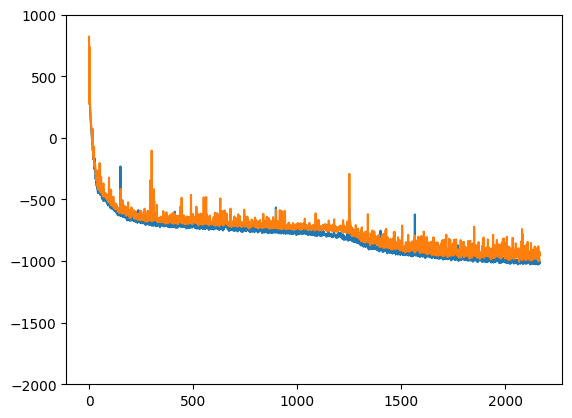

train_weighted_vae: enc
train: iter 0  trainloss -1013.27222  validloss -996.26330±0.00000  bestvalidloss -996.26330  last_update 0
train: iter 1  trainloss -1019.60963  validloss -974.56060±0.00000  bestvalidloss -996.26330  last_update 1
train: iter 2  trainloss -1022.37060  validloss -933.61083±0.00000  bestvalidloss -996.26330  last_update 2
train: iter 3  trainloss -1028.67597  validloss -981.84017±0.00000  bestvalidloss -996.26330  last_update 3
train: iter 4  trainloss -1024.21529  validloss -968.50397±0.00000  bestvalidloss -996.26330  last_update 4
train: iter 5  trainloss -1019.29990  validloss -815.78529±0.00000  bestvalidloss -996.26330  last_update 5
train: iter 6  trainloss -1024.05992  validloss -939.14777±0.00000  bestvalidloss -996.26330  last_update 6
train: iter 7  trainloss -1029.03703  validloss -982.40029±0.00000  bestvalidloss -996.26330  last_update 7
train: iter 8  trainloss -1021.34875  validloss -998.65152±0.00000  bestvalidloss -998.65152  last_update 0
trai

train: iter 75  trainloss -1020.95024  validloss -945.13014±0.00000  bestvalidloss -998.65152  last_update 67
train: iter 76  trainloss -1020.74089  validloss -974.01675±0.00000  bestvalidloss -998.65152  last_update 68
train: iter 77  trainloss -1025.32798  validloss -928.84938±0.00000  bestvalidloss -998.65152  last_update 69
train: iter 78  trainloss -1013.97291  validloss -983.61181±0.00000  bestvalidloss -998.65152  last_update 70
train: iter 79  trainloss -1029.39658  validloss -952.70801±0.00000  bestvalidloss -998.65152  last_update 71
train: iter 80  trainloss -1026.54115  validloss -962.87036±0.00000  bestvalidloss -998.65152  last_update 72
train: iter 81  trainloss -1028.52001  validloss -983.28148±0.00000  bestvalidloss -998.65152  last_update 73
train: iter 82  trainloss -1019.99722  validloss -969.68123±0.00000  bestvalidloss -998.65152  last_update 74
train: iter 83  trainloss -1023.12092  validloss -976.88601±0.00000  bestvalidloss -998.65152  last_update 75
train: ite

train: iter 40  trainloss -1029.62216  validloss -954.76737±0.00000  bestvalidloss -1003.23170  last_update 3
train: iter 41  trainloss -1031.35269  validloss -971.47096±0.00000  bestvalidloss -1003.23170  last_update 4
train: iter 42  trainloss -1024.80387  validloss -953.87679±0.00000  bestvalidloss -1003.23170  last_update 5
train: iter 43  trainloss -995.50606  validloss -970.10028±0.00000  bestvalidloss -1003.23170  last_update 6
train: iter 44  trainloss -1026.13748  validloss -944.86333±0.00000  bestvalidloss -1003.23170  last_update 7
train: iter 45  trainloss -982.04322  validloss -967.33160±0.00000  bestvalidloss -1003.23170  last_update 8
train: iter 46  trainloss -977.76957  validloss -926.11203±0.00000  bestvalidloss -1003.23170  last_update 9
train: iter 47  trainloss -1005.47025  validloss -954.11323±0.00000  bestvalidloss -1003.23170  last_update 10
train: iter 48  trainloss -1017.66215  validloss -965.30121±0.00000  bestvalidloss -1003.23170  last_update 11
train: iter

train: iter 115  trainloss -1023.20680  validloss -966.70956±0.00000  bestvalidloss -1005.62246  last_update 22
train: iter 116  trainloss -1015.22138  validloss -959.44151±0.00000  bestvalidloss -1005.62246  last_update 23
train: iter 117  trainloss -1030.49466  validloss -904.50472±0.00000  bestvalidloss -1005.62246  last_update 24
train: iter 118  trainloss -1036.94088  validloss -998.97275±0.00000  bestvalidloss -1005.62246  last_update 25
train: iter 119  trainloss -997.17634  validloss -968.43816±0.00000  bestvalidloss -1005.62246  last_update 26
train: iter 120  trainloss -1024.42126  validloss -945.05388±0.00000  bestvalidloss -1005.62246  last_update 27
train: iter 121  trainloss -1030.26148  validloss -991.97089±0.00000  bestvalidloss -1005.62246  last_update 28
train: iter 122  trainloss -1025.60861  validloss -965.93516±0.00000  bestvalidloss -1005.62246  last_update 29
train: iter 123  trainloss -1032.62068  validloss -967.66261±0.00000  bestvalidloss -1005.62246  last_upd

train: iter 190  trainloss -1036.03604  validloss -999.56435±0.00000  bestvalidloss -1005.62246  last_update 97
train: iter 191  trainloss -1027.90617  validloss -901.16739±0.00000  bestvalidloss -1005.62246  last_update 98
train: iter 192  trainloss -1021.16532  validloss -960.54885±0.00000  bestvalidloss -1005.62246  last_update 99
train: iter 193  trainloss -1023.81425  validloss -953.03707±0.00000  bestvalidloss -1005.62246  last_update 100
train: fin


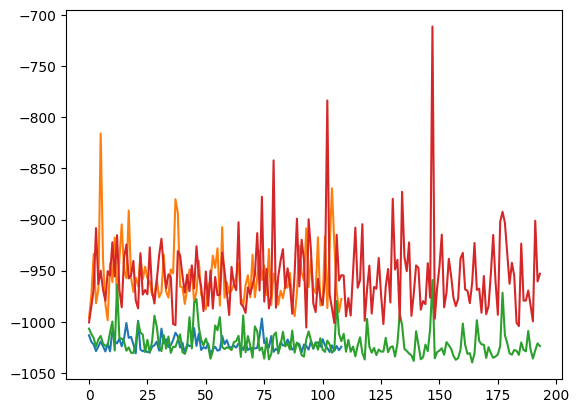

In [9]:
train_curve, valid_curve = vi.train_unweighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, flag=1)
vi.update_mulogvar_list_for_mixture_of_gaussian_belief()
vi.save()
plt.plot(train_curve)
plt.plot(valid_curve)
plt.ylim([-2000, 1000])
plt.show()

train_curve, valid_curve = vi.train_unweighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, flag=2)
vi.update_mulogvar_list_for_mixture_of_gaussian_belief()
vi.save()
plt.plot(train_curve)
plt.plot(valid_curve)
#
#plt.show()

train_curve, valid_curve = vi.train_unweighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, flag=3)
vi.update_mulogvar_list_for_mixture_of_gaussian_belief()
vi.save()
plt.plot(train_curve)
plt.plot(valid_curve)

# y_min = max(-2000, min(max(train_curve),max(valid_curve)))
# y_max = min(1000, max(min(train_curve),min(valid_curve)))
# plt.ylim([y_min, y_max])
plt.show()


In [10]:
vi.load()
vi.update_mulogvar_list_for_mixture_of_gaussian_belief()

load vi_base_ckpt


0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56

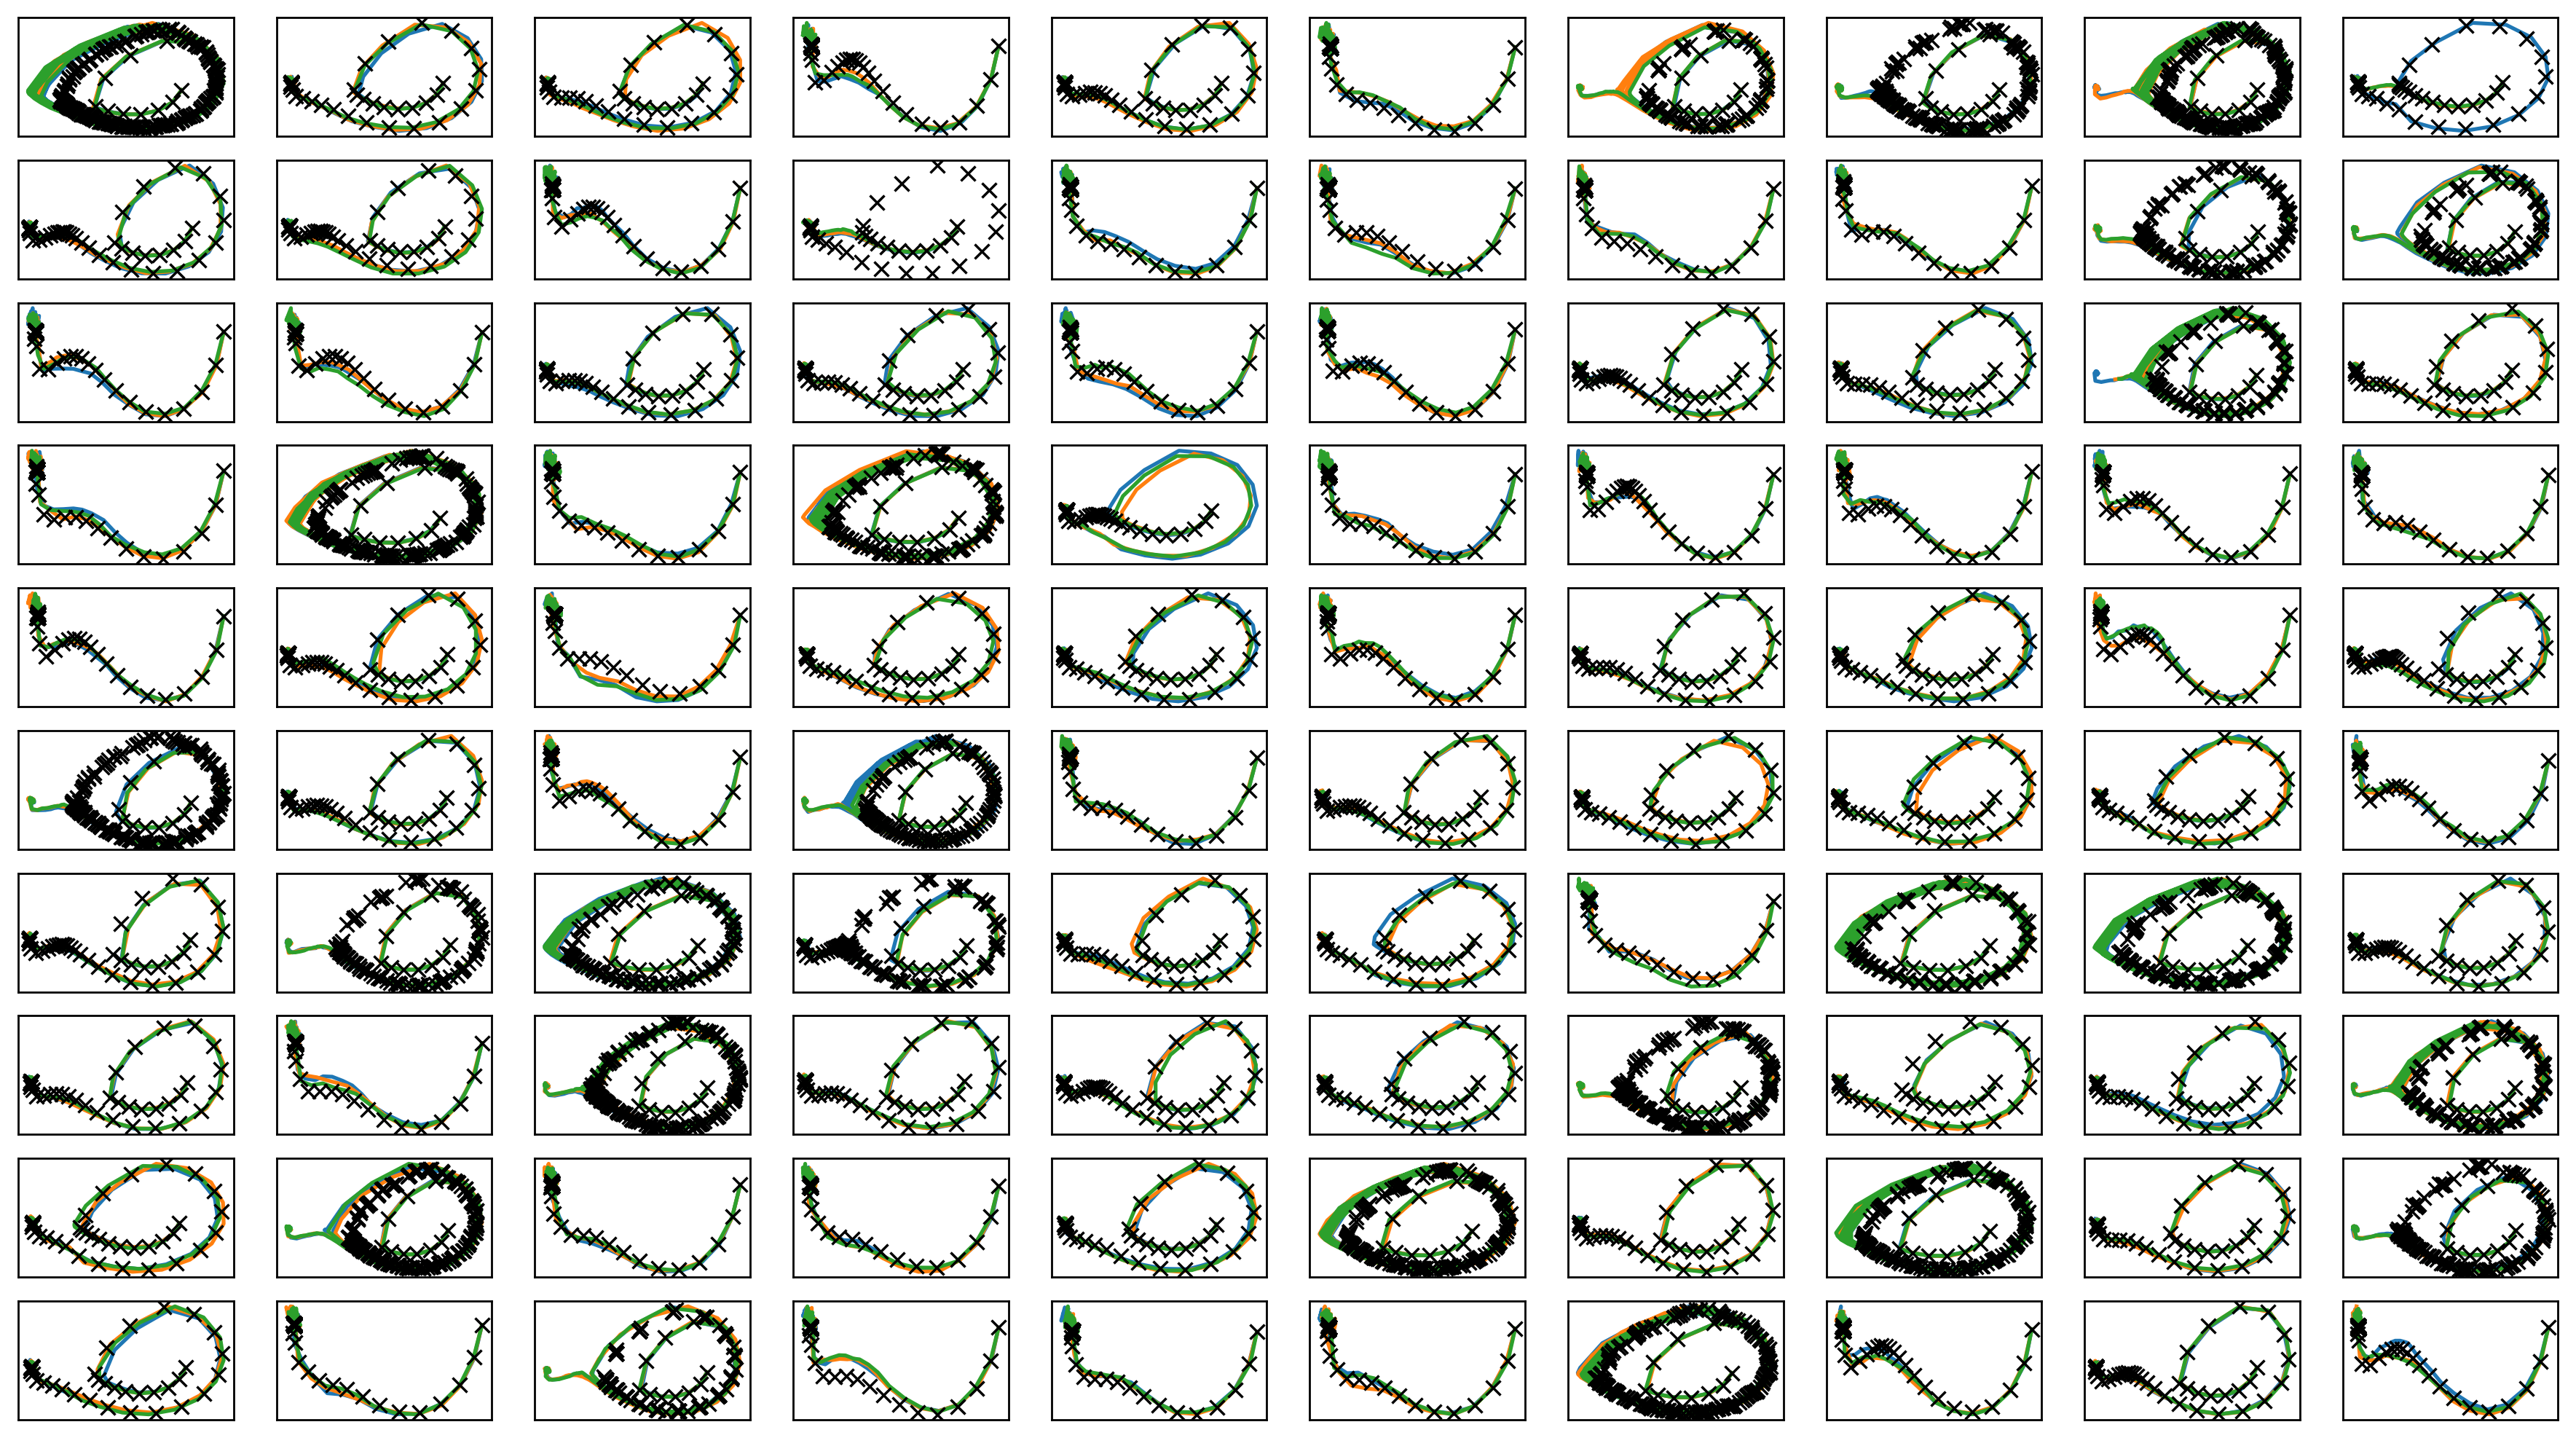

In [11]:
vi.get_sim_rollout_data_fixlen(update_belief=False)
simdata1 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_data_fixlen(update_belief=False)
simdata2 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_data_fixlen(update_belief=False)
simdata3 = copy.deepcopy(vi.simenv_rolloutdata)
# vi.get_sim_rollout_data_fixlen()
# simdata4 = copy.deepcopy(vi.simenv_rolloutdata)
# vi.get_sim_rollout_data_fixlen()
# simdata5 = copy.deepcopy(vi.simenv_rolloutdata)


fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(simdata1[i][:,0], simdata1[i][:,1]) 
    ax_list[-1].plot(simdata2[i][:,0], simdata2[i][:,1]) 
    ax_list[-1].plot(simdata3[i][:,0], simdata3[i][:,1]) 
#     ax_list[-1].plot(simdata4[i][:,0], simdata4[i][:,1]) 
#     ax_list[-1].plot(simdata5[i][:,0], simdata5[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1],"kx") 
plt.savefig("two_stage.png")
plt.savefig("two_stage.eps")
plt.savefig("two_stage.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

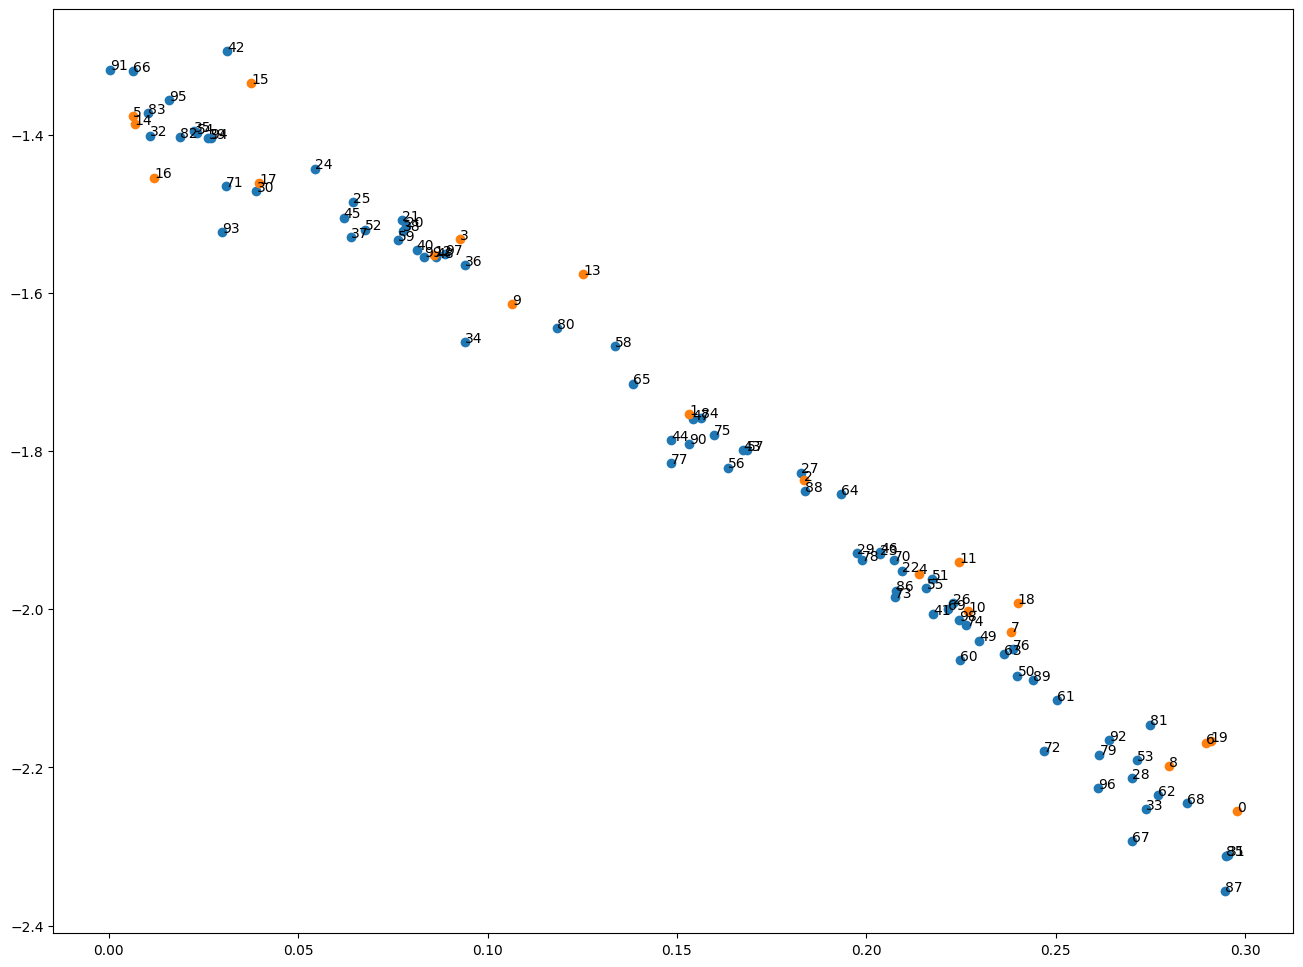

[2.97910163e-01 1.53220826e-01 1.83659868e-01 9.26191816e-02
 2.13844593e-01 6.27837980e-03 2.89779225e-01 2.38265773e-01
 2.79822967e-01 1.06560018e-01 2.26933875e-01 2.24469704e-01
 8.59668072e-02 1.25225228e-01 6.85177675e-03 3.75781305e-02
 1.19629703e-02 3.96666902e-02 2.40024726e-01 2.90920606e-01
 7.83558346e-02 7.74617180e-02 2.09342084e-01 2.03712968e-01
 5.45033670e-02 6.45179456e-02 2.22977599e-01 1.82802197e-01
 2.70079446e-01 1.97623206e-01 3.89891739e-02 2.95551208e-01
 1.09339099e-02 2.73868882e-01 9.39750535e-02 2.24849940e-02
 9.41454935e-02 6.38528531e-02 7.76722308e-02 2.63249718e-02
 8.12571593e-02 2.17703738e-01 3.12692066e-02 1.67437805e-01
 1.48473632e-01 6.20528182e-02 2.03636881e-01 1.54172753e-01
 8.64598938e-02 2.29780458e-01 2.39917584e-01 2.17433570e-01
 6.75730559e-02 2.71498098e-01 2.31935324e-02 2.15892783e-01
 1.63560970e-01 1.68441764e-01 1.33679545e-01 7.63467592e-02
 2.24768216e-01 2.50292794e-01 2.77141700e-01 2.36387227e-01
 1.93330750e-01 1.383419

In [12]:
plt.figure(figsize=(16,12))
np_mulogvar = []
for i in range(len(vi.mulogvar_list_for_mixture_of_gaussian_belief)):
    np_mulogvar.append(vi.mulogvar_list_for_mixture_of_gaussian_belief[i].numpy())
np_mulogvar = np.array(np_mulogvar)

plt.plot(debug_info[vi.validdata_num:,1], np_mulogvar[vi.validdata_num:,0], "o")
plt.plot(debug_info[:vi.validdata_num,1], np_mulogvar[:vi.validdata_num,0], "o")

for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.show()
print(debug_info[:,1])
# plt.show()
print("摩擦係数-潜在変数")

平均-対数分散


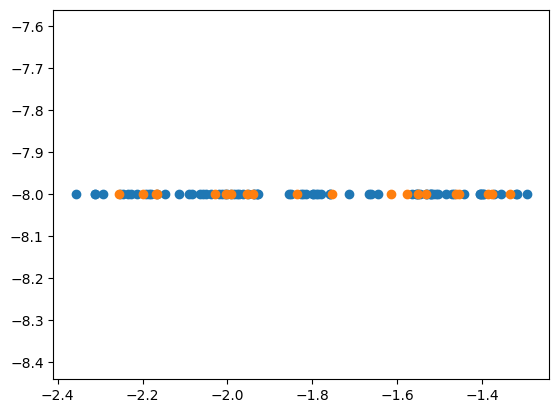

In [13]:
# plt.plot(np_mulogvar[vi.validdata_num:,0],np.exp(0.5*np_mulogvar[vi.validdata_num:,1]), "o")
# plt.plot(np_mulogvar[:vi.validdata_num,0],np.exp(0.5*np_mulogvar[:vi.validdata_num,1]),  "o")
# print("平均-標準偏差")
plt.plot(np_mulogvar[vi.validdata_num:,0],np_mulogvar[vi.validdata_num:,1], "o")
plt.plot(np_mulogvar[:vi.validdata_num,0],np_mulogvar[:vi.validdata_num,1],  "o")
print("平均-対数分散")

In [14]:
print(datetime.datetime.now())

2023-02-24 04:22:52.465229


In [15]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=100)


train: iter 0  trainloss 2.49660  validloss 2.55579±0.00000  bestvalidloss 2.55579  last_update 0
train: iter 1  trainloss 2.30545  validloss 2.34484±0.00000  bestvalidloss 2.34484  last_update 0
train: iter 2  trainloss 2.15699  validloss 2.18888±0.00000  bestvalidloss 2.18888  last_update 0
train: iter 3  trainloss 2.03854  validloss 2.06594±0.00000  bestvalidloss 2.06594  last_update 0
train: iter 4  trainloss 1.94334  validloss 1.95915±0.00000  bestvalidloss 1.95915  last_update 0
train: iter 5  trainloss 1.85748  validloss 1.86337±0.00000  bestvalidloss 1.86337  last_update 0
train: iter 6  trainloss 1.78879  validloss 1.79841±0.00000  bestvalidloss 1.79841  last_update 0
train: iter 7  trainloss 1.72742  validloss 1.73272±0.00000  bestvalidloss 1.73272  last_update 0
train: iter 8  trainloss 1.67236  validloss 1.67519±0.00000  bestvalidloss 1.67519  last_update 0
train: iter 9  trainloss 1.62266  validloss 1.62540±0.00000  bestvalidloss 1.62540  last_update 0
train: iter 10  trai

train: iter 87  trainloss 0.21428  validloss 0.23476±0.00000  bestvalidloss 0.19892  last_update 10
train: iter 88  trainloss 0.20677  validloss 0.24082±0.00000  bestvalidloss 0.19892  last_update 11
train: iter 89  trainloss 0.22016  validloss 0.21740±0.00000  bestvalidloss 0.19892  last_update 12
train: iter 90  trainloss 0.21891  validloss 0.22346±0.00000  bestvalidloss 0.19892  last_update 13
train: iter 91  trainloss 0.22635  validloss 0.22837±0.00000  bestvalidloss 0.19892  last_update 14
train: iter 92  trainloss 0.22479  validloss 0.24394±0.00000  bestvalidloss 0.19892  last_update 15
train: iter 93  trainloss 0.23360  validloss 0.21805±0.00000  bestvalidloss 0.19892  last_update 16
train: iter 94  trainloss 0.21904  validloss 0.21490±0.00000  bestvalidloss 0.19892  last_update 17
train: iter 95  trainloss 0.21467  validloss 0.22432±0.00000  bestvalidloss 0.19892  last_update 18
train: iter 96  trainloss 0.22475  validloss 0.19654±0.00000  bestvalidloss 0.19654  last_update 0
t

train: iter 171  trainloss 0.21292  validloss 0.24217±0.00000  bestvalidloss 0.19654  last_update 75
train: iter 172  trainloss 0.22720  validloss 0.20196±0.00000  bestvalidloss 0.19654  last_update 76
train: iter 173  trainloss 0.23046  validloss 0.21467±0.00000  bestvalidloss 0.19654  last_update 77
train: iter 174  trainloss 0.21807  validloss 0.21548±0.00000  bestvalidloss 0.19654  last_update 78
train: iter 175  trainloss 0.20795  validloss 0.22492±0.00000  bestvalidloss 0.19654  last_update 79
train: iter 176  trainloss 0.22534  validloss 0.22175±0.00000  bestvalidloss 0.19654  last_update 80
train: iter 177  trainloss 0.21951  validloss 0.21340±0.00000  bestvalidloss 0.19654  last_update 81
train: iter 178  trainloss 0.21825  validloss 0.23360±0.00000  bestvalidloss 0.19654  last_update 82
train: iter 179  trainloss 0.20991  validloss 0.21302±0.00000  bestvalidloss 0.19654  last_update 83
train: iter 180  trainloss 0.22093  validloss 0.22918±0.00000  bestvalidloss 0.19654  last_

In [16]:
print(vi.initial_belief)

Parameter containing:
tensor([-1.8061, -2.4002], requires_grad=True)


In [17]:
# import torch
# from utils import kdl_var_approx
# x = torch.linspace(np_mulogvar[:,0].min()-0.5,np_mulogvar[:,0].max()+0.5,50)
# y = torch.linspace(np_mulogvar[:,1].min()-0.5,np_mulogvar[:,1].max()+0.5,50)

# data_xyz=[]
# for i in range(len(x)):
#     print(i)
#     for j in range(len(y)):
#         xy=torch.tensor([x[i],y[j]])
#         with torch.no_grad():
#             z = kdl_var_approx(torch.Tensor([x[i],y[j]]), vi.mulogvar_list_for_mixture_of_gaussian_belief)
#         data_xyz.append(torch.Tensor([x[i],y[j],z]))
# data_xyz = torch.vstack(data_xyz)


In [18]:
# # plt.scatter(data_xyz[:,0],data_xyz[:,1],c=data_xyz[:,2])
# # plt.colorbar()
# plt.scatter(data_xyz[:,0],data_xyz[:,1],c=torch.log(data_xyz[:,2]))
# plt.colorbar()
# i = torch.argmin(data_xyz[:,2])
# print(i,data_xyz[i])

In [19]:
vi.get_belief()

tensor([-1.8061, -2.4002])

get_belief 190 compute_time 0.07508349418640137
real train tensor([-0.0467, -0.0418])
get_belief 231 compute_time 0.09065985679626465
real test tensor([-0.0862, -0.0619])
get_belief 141 compute_time 0.05585455894470215
sim tensor([-0.1062, -0.0776])


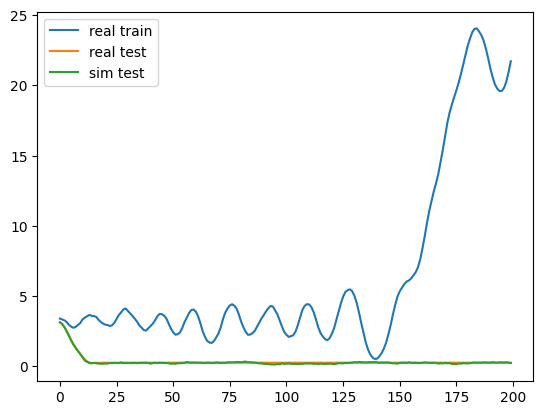

In [20]:
i = 5

tmp_data = 1 * vi.offline_data[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
print("real train",vi.get_belief(sads_array))
plt.plot(tmp_data[:,0], label="real train")

tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
print("real test",vi.get_belief(sads_array))
plt.plot(tmp_data[:,0], label="real test")

tmp_data = 1 * simdata1[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
print("sim", vi.get_belief(sads_array))
plt.plot(tmp_data[:,0], label="sim test")
plt.legend()